В файле <i>orders</i> представлена информация о заказах в онлайн-магазине.
```
OrderID - ID Заказа,
UserID - ID клиента,
OrderTime - время заказа,
items - список элементов в заказе, каждый элемент описан словарем:
    ItemID  - ID продукта,
    price - цена единицы товара,
    quantity - количество единиц товара в заказе
```
В файле <i>categories</i> представлена информация о категории товаров.
```
ItemID - ID продукта,
Category - категория продукта,
ParentCategory - более крупная категория продукта
```

#Казанцева Дарья_Школа DA

Не получается сделать последнее задание. Если есть возможность, я его доделаю и прикреплю на проверку позже. К сожалению, не уложилась в дедлайн с ним.

## Анализ логов продуктового магазина

Представьте, что вы работаете аналитиком онлайн-магазина и ваша цель - повысить GMV (суммарную выручку от продажи товаров). Для этого вы хотите провести ряд исследований и придумать какие-то меры для увеличения выручки.

* Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?
* Исследуйте и покажите на графике, как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье"  ?
* Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.
* Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки',  'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Для скачивания файлов из репозитория в Colab
!wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv -P data
!wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json -P data

--2024-09-23 09:27:45--  https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2246830 (2.1M) [text/plain]
Saving to: ‘data/categories.csv.1’

categories.csv.1    100%[===================>]   2.14M  8.72MB/s    in 0.2s    

2024-09-23 09:27:46 (8.72 MB/s) - ‘data/categories.csv.1’ saved [2246830/2246830]

--2024-09-23 09:27:46--  https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/orders.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request s

In [ ]:
categories = pd.read_csv('data/categories.csv')
orders = pd.read_json('data/orders.json')

In [ ]:
categories.head()


,ItemID,Category,ParentCategory
0,1000002,Сладости для диабетиков,Сладости
1,1000046,Вода,Напитки
2,1000048,Сладости для диабетиков,Сладости
3,1000049,Вода,Напитки
4,1000061,Фрукты,Овощи и фрукты


In [ ]:
orders.head()

,OrderID,UserID,OrderTime,items,Date
0,90659865,1.609460e+18,2021-01-01 03:51:42,"[{'ItemID': '413736', 'price': 36.72, 'quantit...",2021-01-01
1,90622054,2.499293e+18,2021-01-01 04:13:13,"[{'ItemID': '961454', 'price': 179.9, 'quantit...",2021-01-01
2,90659952,3.945866e+17,2021-01-01 05:48:53,"[{'ItemID': '306553', 'price': 101.9, 'quantit...",2021-01-01
3,89765281,5.412765e+18,2021-01-01 08:33:41,"[{'ItemID': '979703', 'price': 99.9, 'quantity...",2021-01-01
4,90582308,6.380061e+18,2021-01-01 09:55:35,"[{'ItemID': '303765', 'price': 44.9, 'quantity...",2021-01-01


In [ ]:
items_cost = pd.DataFrame(columns=['ItemID','price','quantity','Date'])

In [ ]:
a = 0
for i in range(40375):
  items_cost = pd.concat([items_cost,pd.DataFrame(orders['items'][i])],ignore_index=True)
  for y in range(len(orders['items'][i])):
    items_cost['Date'][a] = orders['Date'][i]
    a=a+1

In [ ]:
 #Цикл, написанный выше, очень долго обрабатывается, потому
 #я решила сохранить полученный датафрейм в файл
items_csv_data = items_cost.to_csv('items_cost1.csv', index = True)

In [ ]:
#Файл
!wget https://raw.githubusercontent.com/da-python/new-modul-python/main/Lesson4/hometask/data/categories.csv -P data

In [ ]:
 items_cost = pd.read_csv('data/items_cost1.csv')

In [ ]:
items_cost

,ItemID,price,quantity,Date,cost
0,413736,36.72,2,2021-01-01 00:00:00,73.44
1,523171,90.32,1,2021-01-01 00:00:00,90.32
2,452831,223.11,1,2021-01-01 00:00:00,223.11
3,303673,59.90,7,2021-01-01 00:00:00,419.3
4,318193,319.91,2,2021-01-01 00:00:00,639.82
...,...,...,...,...,...
852813,439036,17.50,1,2021-06-30 00:00:00,17.5
852814,303765,6.56,1,2021-06-30 00:00:00,6.56
852815,341794,69.90,1,2021-06-30 00:00:00,69.9
852816,307216,2.99,1,2021-06-30 00:00:00,2.99


In [ ]:
for i in items_cost:
  items_cost['cost'] = items_cost['price'] * items_cost['quantity']

In [ ]:
items_cost.ItemID = items_cost.ItemID.astype(int)

In [ ]:
categories.ItemID = categories.ItemID.astype(int)

In [ ]:
grouped_items_parent = items_cost.merge(categories, on = 'ItemID', how='left')

In [ ]:
grouped_items_parent

,ItemID,price,quantity,Date,cost,Category,ParentCategory
0,413736,36.72,2,2021-01-01 00:00:00,73.44,Мороженое,Молочная продукция
1,523171,90.32,1,2021-01-01 00:00:00,90.32,Полуфабрикаты,Бакалея
2,452831,223.11,1,2021-01-01 00:00:00,223.11,Овощные смеси,Овощи и фрукты
3,303673,59.90,7,2021-01-01 00:00:00,419.3,Фрукты,Овощи и фрукты
4,318193,319.91,2,2021-01-01 00:00:00,639.82,Фрукты,Овощи и фрукты
...,...,...,...,...,...,...,...
852813,439036,17.50,1,2021-06-30 00:00:00,17.5,Копченая и соленая рыба,"Мясо, птица, рыба"
852814,303765,6.56,1,2021-06-30 00:00:00,6.56,Овощи,Овощи и фрукты
852815,341794,69.90,1,2021-06-30 00:00:00,69.9,Мука,Бакалея
852816,307216,2.99,1,2021-06-30 00:00:00,2.99,Компоненты для выпечки,Мучные изделия


##Визуализируйте динамику продаж напитков в ParentCategory. Есть ли эффект сезонности в продажах?

In [ ]:
gip_drinks = grouped_items_parent[(grouped_items_parent['ParentCategory'] == 'Напитки')]


In [ ]:
gip_drinks

,ItemID,price,quantity,Date,cost,Category,ParentCategory
17,313776,99.90,1,2021-01-01 00:00:00,99.9,"Соки, нектары",Напитки
101,341996,36.77,6,2021-01-01 00:00:00,220.62,Вода,Напитки
115,616037,310.00,6,2021-01-01 00:00:00,1860.0,"Соки, нектары",Напитки
116,976028,124.90,5,2021-01-01 00:00:00,624.5,"Соки, нектары",Напитки
134,316400,35.90,1,2021-01-01 00:00:00,35.9,Вода,Напитки
...,...,...,...,...,...,...,...
852786,692142,159.90,1,2021-06-30 00:00:00,159.9,"Соки, нектары",Напитки
852787,461376,429.00,1,2021-06-30 00:00:00,429.0,Чай,Напитки
852792,671759,89.90,2,2021-06-30 00:00:00,179.8,Растительные напитки и молоко,Напитки
852793,459822,89.90,2,2021-06-30 00:00:00,179.8,Растительные напитки и молоко,Напитки


Text(0.5, 1.0, 'Динамика продаж напитков')

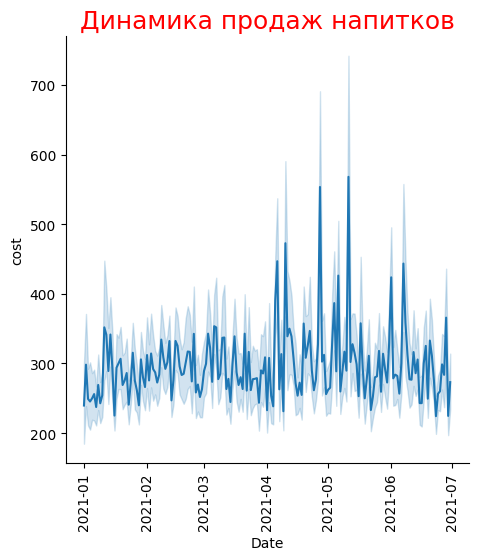

In [ ]:
sns.relplot(
    x='Date',
    y='cost',
    data = gip_drinks,
    kind='line'
)
plt.xticks(rotation=90)
plt.title('Динамика продаж напитков', size=18, color='r')

В жаркий период заказывают напитков на большую стоимость по сравнению с другими месяцами, эффект сезонности есть

##Исследуйте и покажите на графике, как отличаются продажи в будние и выходные в категориях 'Сокосодержащие напитки, смузи' и "Печенье" ?

In [ ]:
grouped_items_parent['weekend'] = 'NaN'

In [ ]:
for i in range(len(grouped_items_parent)):
  if grouped_items_parent['Date'][i].dayofweek == 5.0:
    grouped_items_parent['weekend'][i] = 'Y'
  elif grouped_items_parent['Date'][i].dayofweek == 6.0:
    grouped_items_parent['weekend'][i] = 'Y'
  else:
    grouped_items_parent['weekend'][i] = 'N'

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-22-4861f88d8e9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_items_parent['weekend'][i] = 'N'
<ipython-input-22-4861f88d8e9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_items_parent['weekend'][i] = 'N'
<ipython-input-22-4861f88d8e9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_items_parent['weekend'][i] = 'N'
<ipyt

In [ ]:
grouped_items_parent.head(5)

,ItemID,price,quantity,Date,cost,Category,ParentCategory,weekend
0,413736,36.72,2,2021-01-01 00:00:00,73.44,Мороженое,Молочная продукция,N
1,523171,90.32,1,2021-01-01 00:00:00,90.32,Полуфабрикаты,Бакалея,N
2,452831,223.11,1,2021-01-01 00:00:00,223.11,Овощные смеси,Овощи и фрукты,N
3,303673,59.90,7,2021-01-01 00:00:00,419.3,Фрукты,Овощи и фрукты,N
4,318193,319.91,2,2021-01-01 00:00:00,639.82,Фрукты,Овощи и фрукты,N


In [ ]:
gip_drinks_cookies = grouped_items_parent[(grouped_items_parent['Category'] == 'Сокосодержащие напитки, смузи')|(grouped_items_parent['Category'] == 'Печенье')]

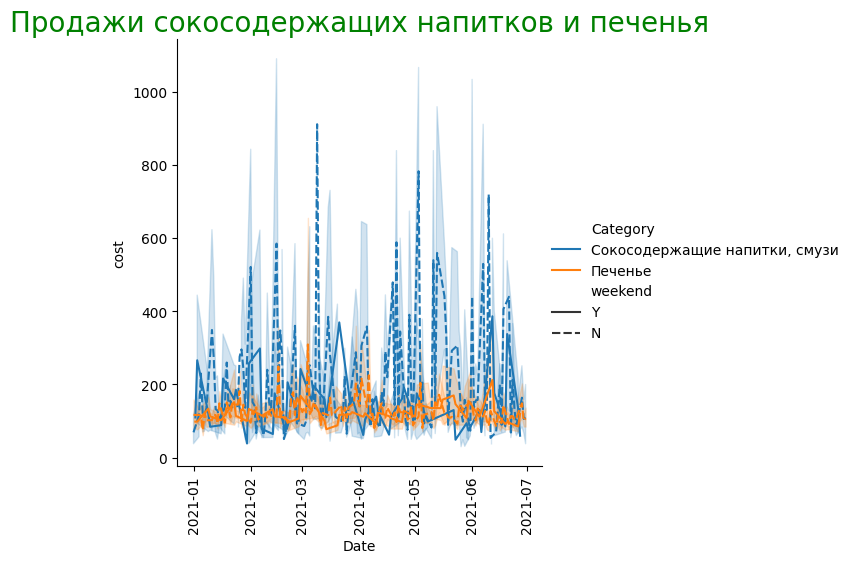

In [ ]:
sns.relplot(
    x='Date',
    y='cost',
    hue ='Category',
    hue_order=["Сокосодержащие напитки, смузи", "Печенье"],
    style = 'weekend',
    style_order=["Y", "N"],
    kind='line',
    data=gip_drinks_cookies)
plt.xticks(rotation=90)
plt.title('Продажи сокосодержащих напитков и печенья', size=20, color='g')

plt.show();


Сокосодержащие напитки покупают на большую сумму по сравнению с печеньем. И если сокосодержащие напитки покупают больше в будни, то печенье в выходные.

##Визуализируйте структуру продаж ParentCategory по показателю GMV за один месяц. Укажите категорию с наибольшей долей GMV.

In [ ]:
grouped_items_parent['Date'] = pd.to_datetime(grouped_items_parent['Date'])

In [ ]:
gip_structure = grouped_items_parent[grouped_items_parent['Date'].between('2021-01-01', '2021-01-31')]

<Axes: ylabel='Доля продаж товара в месячной выручке'>

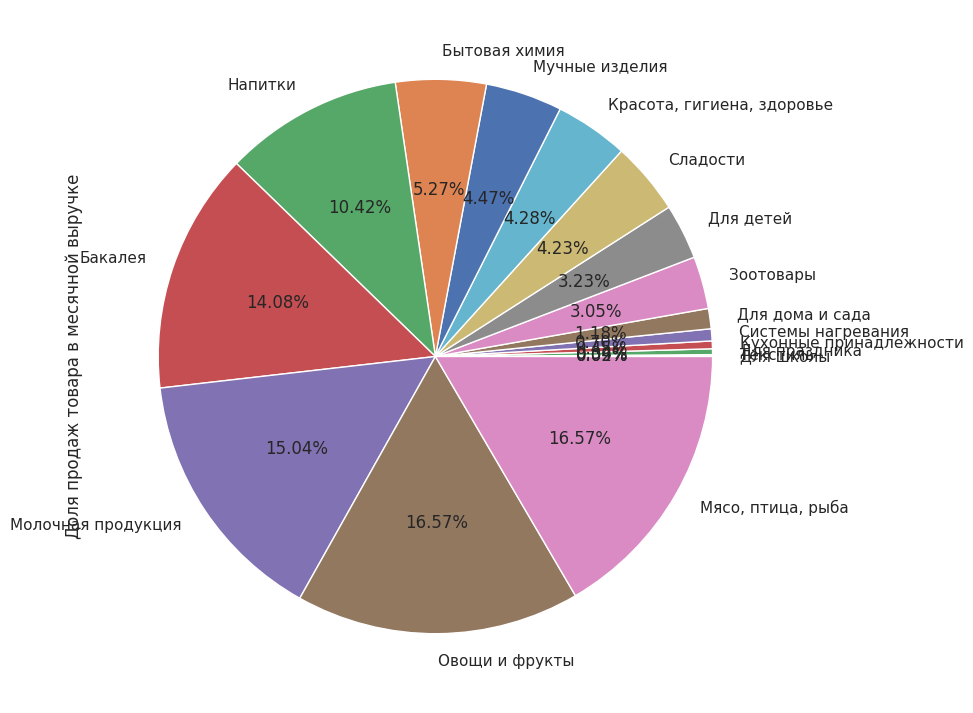

In [ ]:
gip_structure.groupby(['ParentCategory'])['cost'].sum().sort_values().plot(kind='pie',ylabel = 'Доля продаж товара в месячной выручке',autopct="%1.2f%%")

In [ ]:
Мясо, птица, рыба - самая продаваемая категория

##Исследуйте взаимосвясь между продажами категорий 'Чипсы, снеки, попкорн' и напитками:'Вода', 'Газированные напитки', 'Соки, нектары', 'Лимонады', 'Безалкогольное пиво', 'Вино', 'Пиво'. С чем сильнее коррелируют 'Чипсы, снеки, попкорн'?